## Import Necessary Libraries


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.metrics import accuracy_score, classification_report

## Import Dataset to dataframe

In [8]:
df = pd.read_csv('diabetics.csv')

## Data Pre-processing


In [9]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [41]:
columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Diabetes_012']

In [42]:

df = df[columns]

In [43]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_012
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,0.0


In [44]:
df.shape

(253680, 18)

In [45]:
df.isnull().sum()

,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
HvyAlcoholConsump,0
AnyHealthcare,0


## Data Visualization


/tmp/ipython-input-46-70705864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=df, palette='viridis')


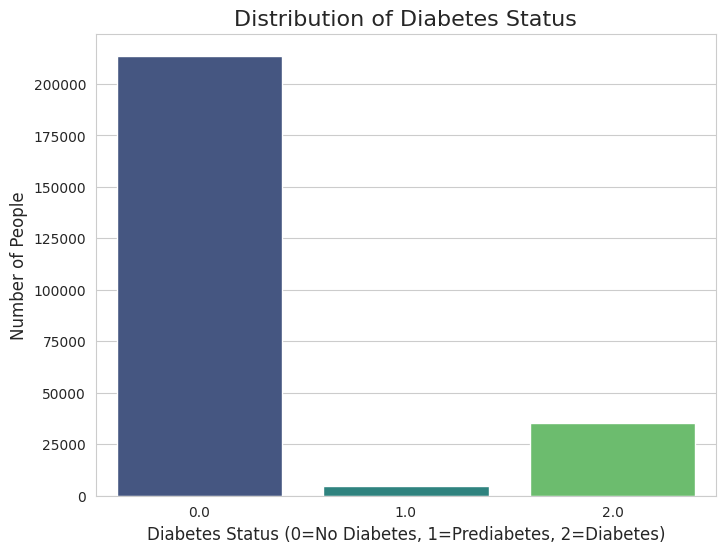

In [46]:
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=df, palette='viridis')

# Add titles and labels for clarity
plt.title('Distribution of Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status (0=No Diabetes, 1=Prediabetes, 2=Diabetes)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.show()


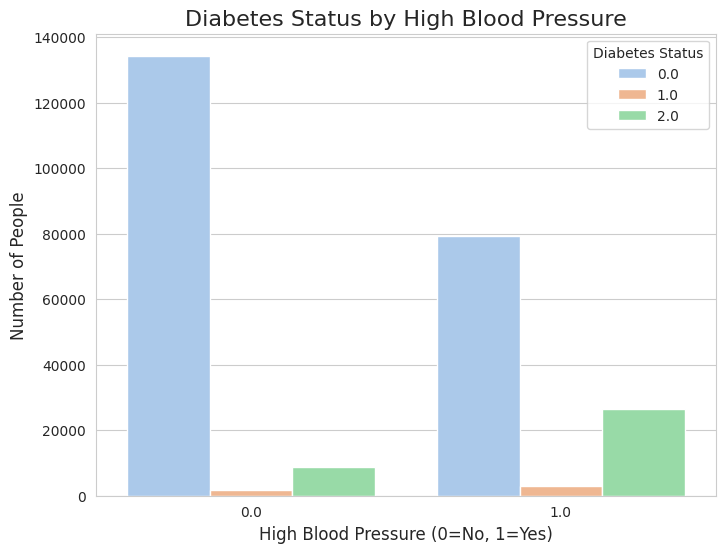

In [47]:
# Relationship between High Blood Pressure and Diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='Diabetes_012', data=df, palette='pastel')

plt.title('Diabetes Status by High Blood Pressure', fontsize=16)
plt.xlabel('High Blood Pressure (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(title='Diabetes Status')
plt.show()

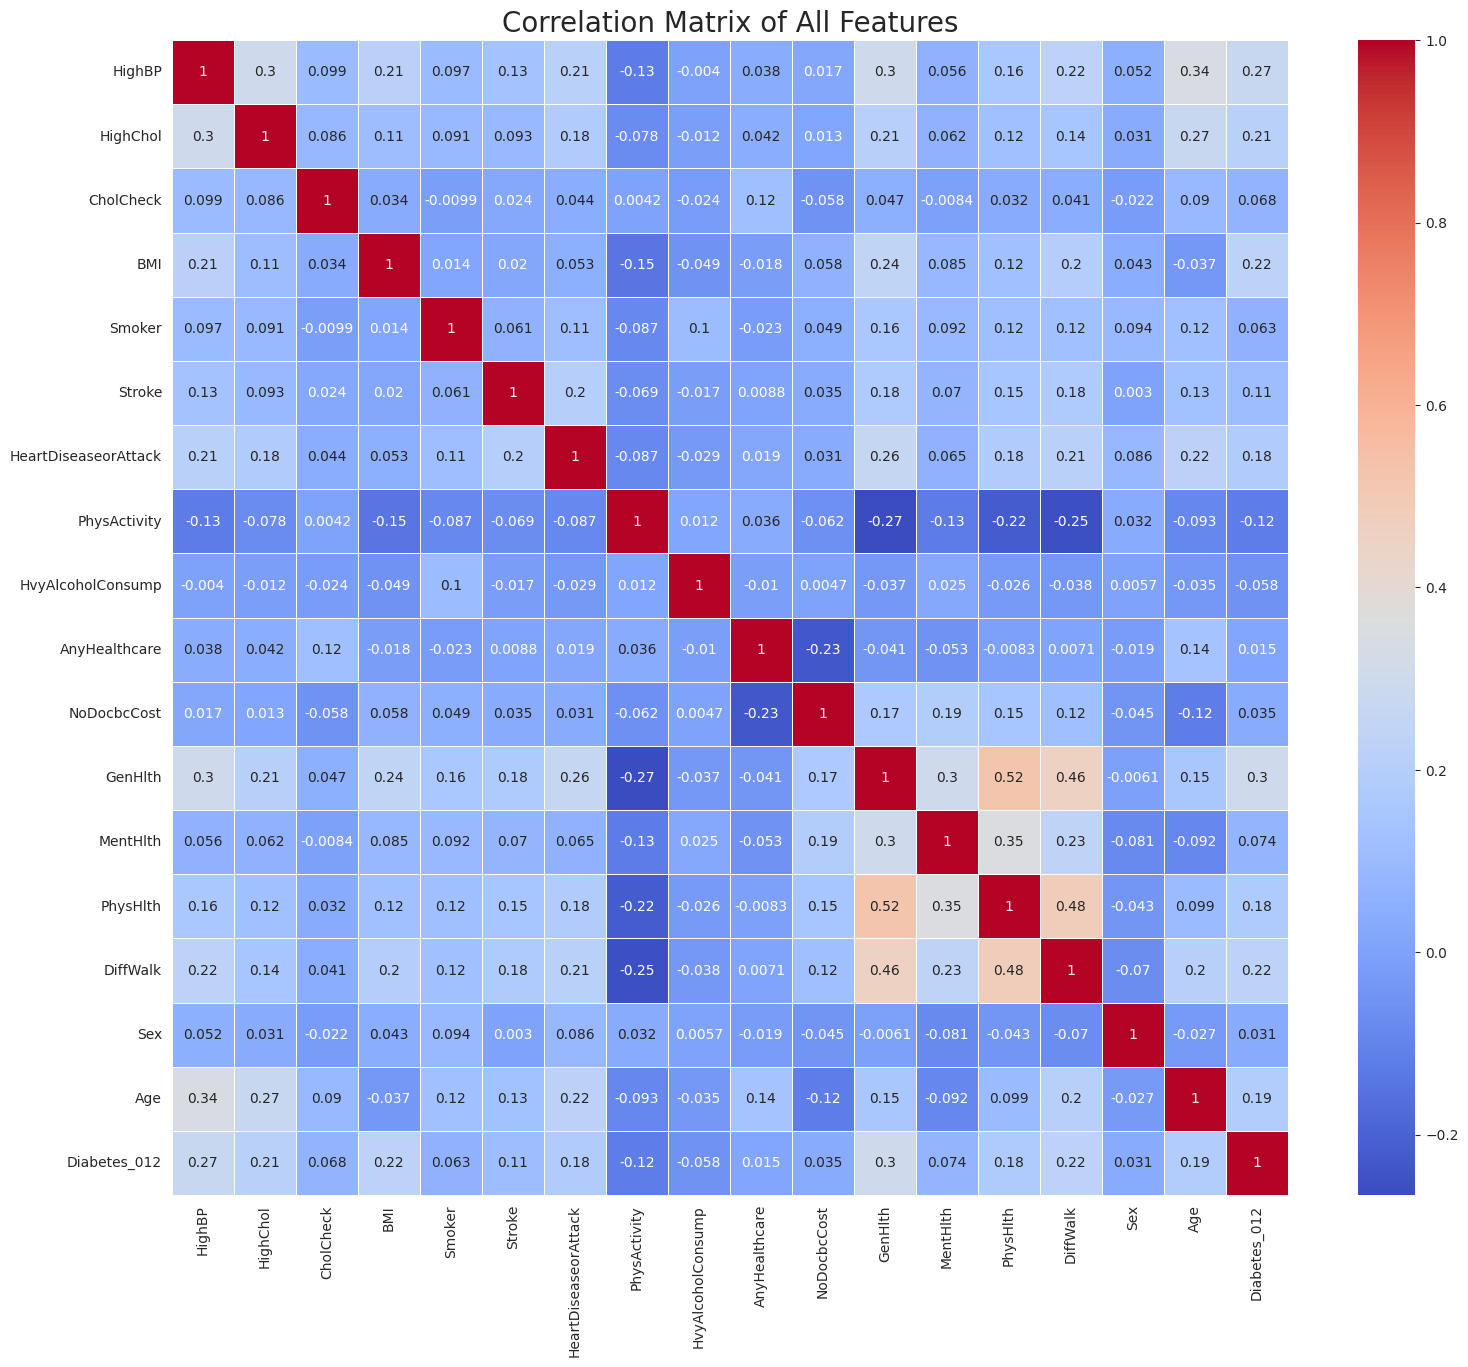

In [48]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
# Note: annot=True would show the numbers, but it's unreadable on a large matrix.

plt.title('Correlation Matrix of All Features', fontsize=20)
plt.show()

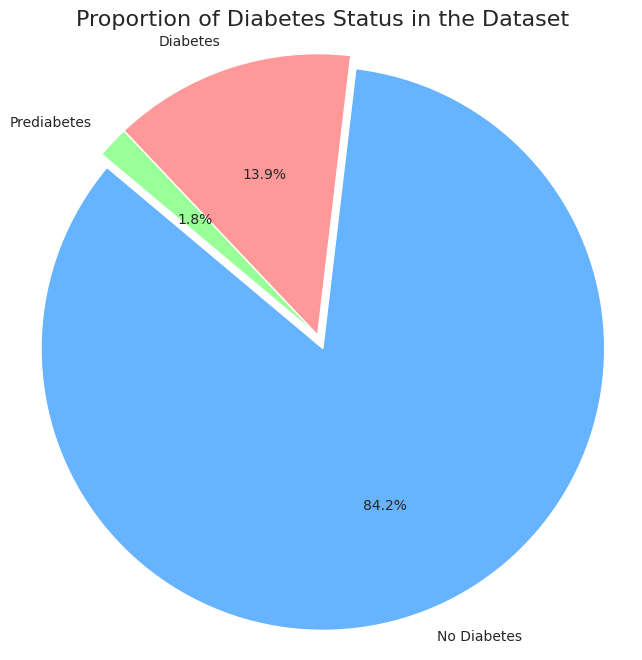

In [49]:
diabetes_counts = df['Diabetes_012'].value_counts()

# Define the labels for the pie chart slices
labels = ['No Diabetes', 'Diabetes', 'Prediabetes']
# Note: The order of labels should correspond to the value_counts() output.
# You can print(diabetes_counts) to confirm the order of 0, 2, and 1.
# Let's assume the order is 0, 2, 1 for this example.
# A more robust way is to use the index: labels = diabetes_counts.index

# Define custom colors
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=(0.05, 0, 0)) # Slightly "explode" the first slice

plt.title('Proportion of Diabetes Status in the Dataset', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


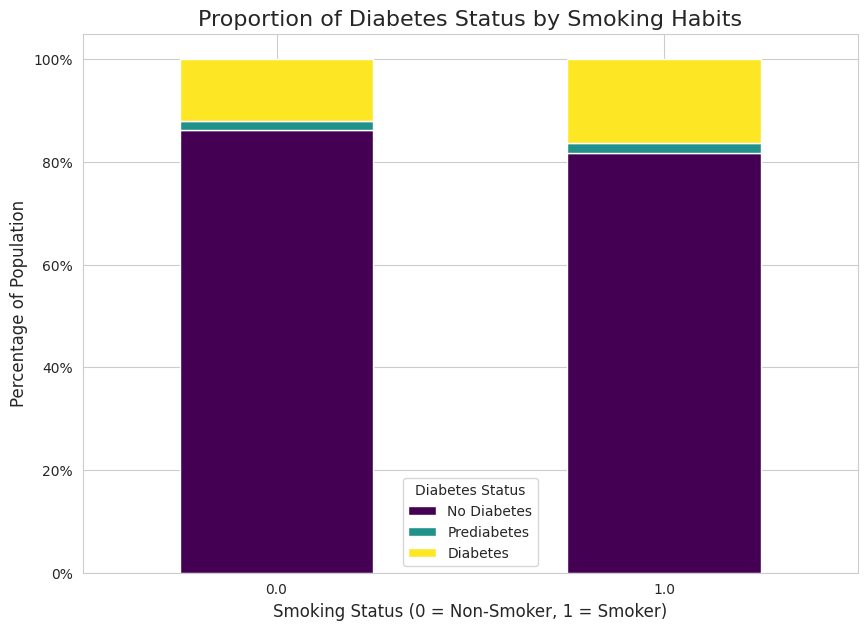

In [50]:
# Create a contingency table (crosstab) of smokers and diabetes status
smoker_diabetes = pd.crosstab(df['Smoker'], df['Diabetes_012'])

# Normalize the data to get percentages for each group
smoker_diabetes_pct = smoker_diabetes.div(smoker_diabetes.sum(axis=1), axis=0)

# Plot the 100% stacked bar chart
ax = smoker_diabetes_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    colormap='viridis'
)

# Format the Y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add titles and labels
plt.title('Proportion of Diabetes Status by Smoking Habits', fontsize=16)
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)', fontsize=12)
plt.ylabel('Percentage of Population', fontsize=12)
plt.xticks(rotation=0) # Keep the x-axis labels horizontal

# Rename the legend for clarity
L = plt.legend(title='Diabetes Status')
L.get_texts()[0].set_text('No Diabetes')
L.get_texts()[1].set_text('Prediabetes')
L.get_texts()[2].set_text('Diabetes')

plt.show()


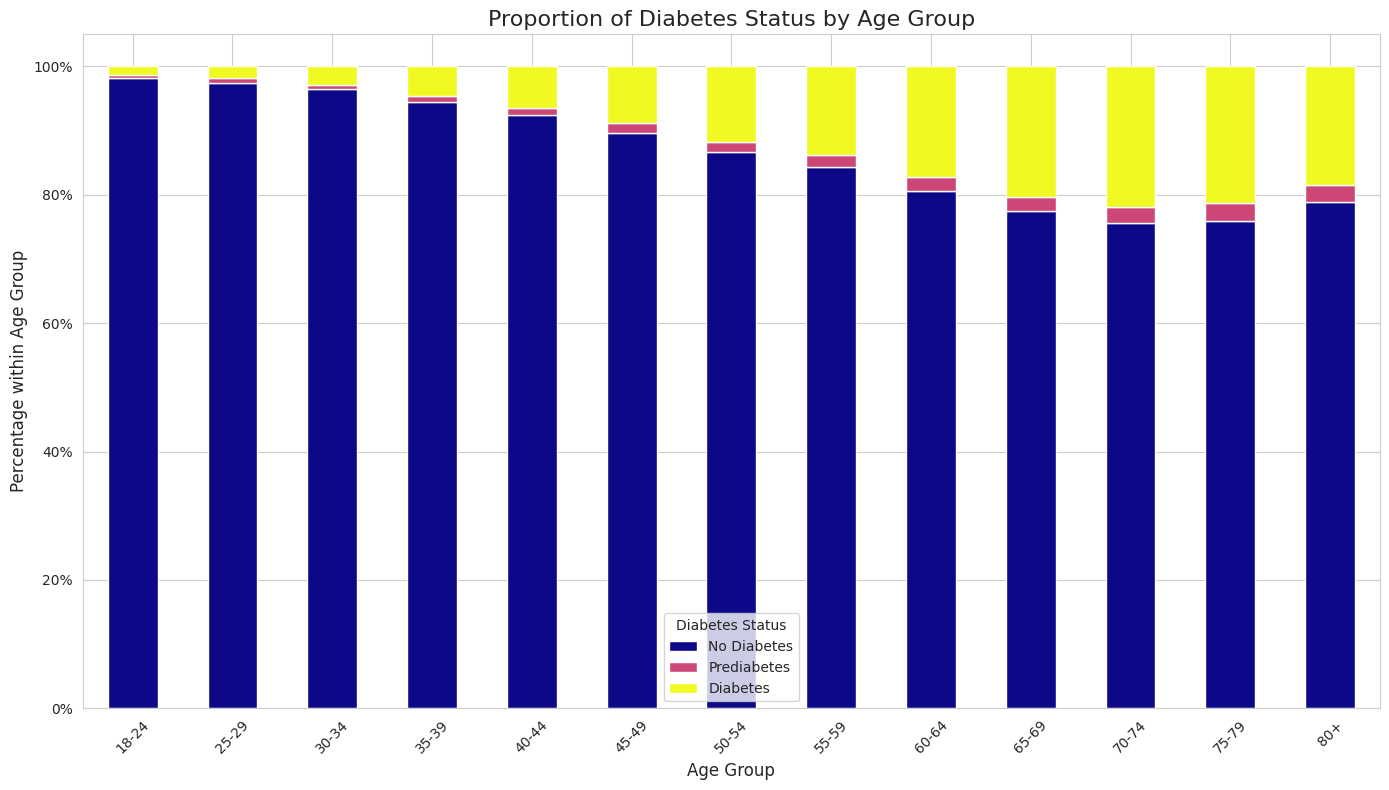

In [51]:
age_labels = [
    '18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
]

# Create a contingency table of Age and Diabetes status
age_diabetes = pd.crosstab(df['Age'], df['Diabetes_012'])

# Normalize the data to get percentages for each age group
age_diabetes_pct = age_diabetes.div(age_diabetes.sum(axis=1), axis=0)

# Plot the 100% stacked bar chart
ax = age_diabetes_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='plasma'
)

# Format the Y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# *** SET THE CUSTOM X-AXIS LABELS HERE ***
ax.set_xticklabels(age_labels)

# Add titles and labels
plt.title('Proportion of Diabetes Status by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage within Age Group', fontsize=12)
plt.xticks(rotation=45) # Rotate labels for better readability

# Rename the legend for clarity
L = plt.legend(title='Diabetes Status')
L.get_texts()[0].set_text('No Diabetes')
L.get_texts()[1].set_text('Prediabetes')
L.get_texts()[2].set_text('Diabetes')

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()



## Model Training

In [52]:
# 'y' is the column we want to predict
y = df['Diabetes_012']

# 'X' is all the other columns used for prediction
X = df.drop('Diabetes_012', axis=1)

In [53]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
# stratify=y ensures the proportion of diabetics is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
from sklearn.preprocessing import StandardScaler

# All columns in this dataset are numeric and can be scaled
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [56]:
# Make predictions on the scaled test data
y_pred_lr = model.predict(X_test_scaled)

In [57]:
y_pred_lr

array([0., 0., 0., ..., 2., 0., 0.])

In [58]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 84.53%


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the Random Forest model
# class_weight='balanced' tells the model to pay more attention to the minority classes.
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1  # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("--- Random Forest Results ---")
print(classification_report(y_test, y_pred_rf))

--- Random Forest Results ---
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     42741
         1.0       0.02      0.04      0.03       926
         2.0       0.35      0.26      0.30      7069

    accuracy                           0.79     50736
   macro avg       0.41      0.40      0.40     50736
weighted avg       0.78      0.79      0.79     50736



In [60]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create the XGBoost model
# scale_pos_weight is used for imbalance, but it's more complex for multi-class.
# We will start without it and can tune it later if needed.
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax', # Specify multi-class classification
    num_class=3,               # Number of classes
    random_state=42,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("\n--- XGBoost Results ---")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Results ---
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Performance

In [61]:
# Create a dictionary to hold the predictions from each model
predictions = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

# Create an empty dictionary to store the performance metrics
performance_data = {}

# Loop through each model's predictions
for model_name, y_pred in predictions.items():
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Get the classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store the relevant metrics in our dictionary
    performance_data[model_name] = {
        'Accuracy': f"{accuracy:.2%}",
    }

# Convert the dictionary to a pandas DataFrame for a nice display
comparison_df = pd.DataFrame.from_dict(performance_data, orient='index')

# Display the comparison table
print("--- Model Performance Comparison ---")
print(comparison_df['Accuracy'])

--- Model Performance Comparison ---
Logistic Regression    84.53%
Random Forest          79.30%
XGBoost                84.80%
Name: Accuracy, dtype: object


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/tmp/ipython-input-62-1307366986.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=accuracy_values.index, y=accuracy_values.values, palette='viridis')


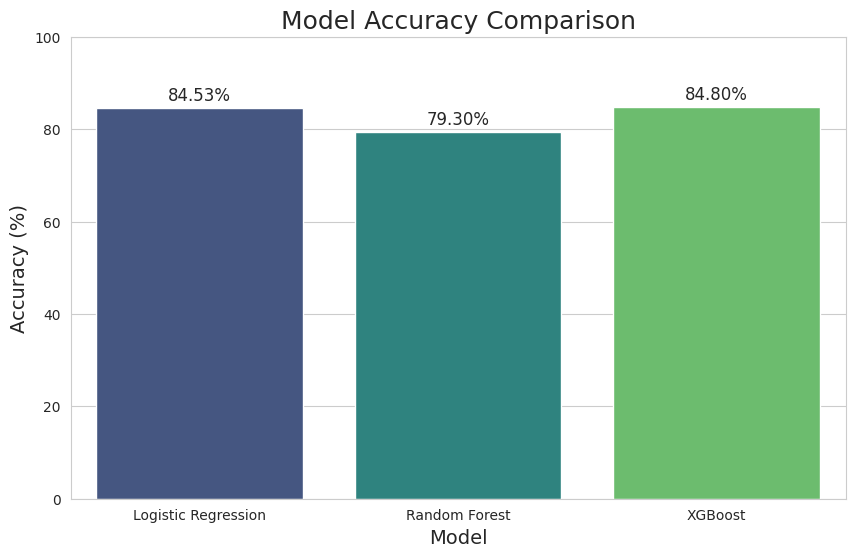

In [62]:
accuracy_data = comparison_df['Accuracy']

# Convert from 'XX.X%' string format to a float for plotting
accuracy_values = accuracy_data.str.replace('%', '').astype(float)

# --- Plotting the Bar Chart ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=accuracy_values.index, y=accuracy_values.values, palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 100) # Set y-axis limit from 0 to 100

# Add value labels (annotations) on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12)

plt.show()
